# 01_EDA - YouTube Views (Análise Exploratória de Dados)

**Objetivo:** Analisar o dataset `youtube_views.csv` e documentar as descobertas sem realizar limpeza ou transformações (apenas EDA).

## Índice

1. Importação de bibliotecas
2. Carregamento dos dados
3. Visão geral do dataset
4. Análise de valores faltantes
5. Análise da variável alvo (`views`)
6. Análise univariada - numéricas
7. Análise univariada - categóricas
8. Análise de correlações
9. Análise bivariada (features vs target)
10. Identificação de outliers
11. Conclusões e descobertas

---

> Observação: o notebook tenta carregar o arquivo em `data/datasets/youtube_views.csv` e, se não existir, tenta `youtube_views.csv`. Ajuste o caminho conforme sua organização de pastas.

## 1) Importação de Bibliotecas

Abaixo importamos as bibliotecas que usaremos para a EDA e explicamos brevemente a função de cada uma.

In [40]:
# Bibliotecas para EDA
import pandas as pd              # manipulação de tabelas
import numpy as np               # operações numéricas
import matplotlib.pyplot as plt  # gráficos básicos
import seaborn as sns            # visualizações estatísticas
from scipy import stats          # testes estatísticos e distribuições
import os
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

**Explicação curta:**
- `pandas`: carregar e explorar dados
- `numpy`: operações numéricas e arrays
- `matplotlib`/`seaborn`: gráficos e visualizações
- `scipy.stats`: testes como Shapiro-Wilk e funções estatísticas

---

## 2) Carregamento dos Dados

Tentaremos carregar o dataset usando dois caminhos: `data/datasets/youtube_views.csv` (padrão do repositório) e `youtube_views.csv` (raiz).

In [41]:
# Tentar carregar o dataset em dois caminhos comuns
paths = ["../data/datasets/youtube_views.csv", "youtube_views.csv"]
for p in paths:
    if os.path.exists(p):
        df = pd.read_csv(p)
        print(f"Carregado: {p} (linhas={len(df)}, colunas={len(df.columns)})")
        break
else:
    # Se nenhum existir, tenta ler com erro mais claro para o usuário
    raise FileNotFoundError(f"Nenhum arquivo encontrado. Verifique se o 'youtube_views.csv' está em 'data/datasets/' ou na raiz do projeto. Tentados: {paths}")


# Mostrar primeiras e últimas linhas
display(df.head())
display(df.tail())

Carregado: ../data/datasets/youtube_views.csv (linhas=2520, colunas=22)


,video_id,duration_minutes,title_length,description_length,tags_count,has_thumbnail_custom,video_quality,category,language,has_subtitles,...,previous_videos_count,avg_upload_frequency_days,comments_count,likes_count,shares_count,playlist_adds,promoted,upload_time,upload_day,total_views
0,VID00197,3,53,589.0,34.0,Sim,720p,Fitness,Português,Não,...,406,9,2804.0,5269,NaN,624,Não,Tarde,Sexta,2219779
1,VID00987,60,95,NaN,17.0,Não,720p,Culinária,Português,Não,...,25,14,9634.0,9448,1679.0,894,Sim,Tarde,Sexta,719904
2,VID01091,47,35,168.0,20.0,Não,1080p,Gaming,Espanhol,Não,...,59,1,6943.0,34028,542.0,540,Não,Manhã,Seg-Qui,1420456
3,VID00388,8,12,260.0,4.0,Sim,1080p,Tecnologia,Português,Sim,...,93,10,9427.0,42695,3096.0,188,Não,Madrugada,Sábado,329746
4,VID02222,56,94,648.0,48.0,Não,720p,Vlogs,Espanhol,Não,...,205,13,2993.0,40761,311.0,957,Não,Manhã,Domingo,984985


,video_id,duration_minutes,title_length,description_length,tags_count,has_thumbnail_custom,video_quality,category,language,has_subtitles,...,previous_videos_count,avg_upload_frequency_days,comments_count,likes_count,shares_count,playlist_adds,promoted,upload_time,upload_day,total_views
2515,VID01639,49,19,330.0,19.0,Sim,1080p,Música,Português,Sim,...,87,6,9487.0,18978,535.0,396,Não,Manhã,Sexta,391825
2516,VID01096,46,15,775.0,26.0,Sim,4K,Gaming,Português,Não,...,219,30,1752.0,25656,4239.0,318,Não,Manhã,Sexta,1411440
2517,VID01131,60,78,983.0,10.0,Sim,720p,Educação,Português,Não,...,368,13,4287.0,15094,1525.0,759,Não,Tarde,Domingo,419713
2518,VID01295,45,100,475.0,38.0,Sim,1080p,Culinária,Português,Sim,...,481,7,4648.0,11674,2461.0,514,Não,Manhã,Sexta,679891
2519,VID00861,54,51,376.0,20.0,Não,480p,Educação,Português,Não,...,306,11,5700.0,13957,4635.0,75,Não,Madrugada,Domingo,601691


## 3) Visão Geral do Dataset

Dimensões, tipos e estatísticas descritivas.

In [42]:
# Dimensões e tipos
print("Dimensões (linhas, colunas):", df.shape)
print("\nTipos das colunas:")
display(df.dtypes)

# Estatísticas descritivas (numéricas e categóricas)
display(df.describe(include='all').T)

Dimensões (linhas, colunas): (2520, 22)

Tipos das colunas:


video_id                      object
duration_minutes               int64
title_length                   int64
description_length           float64
tags_count                   float64
has_thumbnail_custom          object
video_quality                 object
category                      object
language                      object
has_subtitles                 object
channel_subscribers            int64
channel_age_months           float64
previous_videos_count          int64
avg_upload_frequency_days      int64
comments_count               float64
likes_count                    int64
shares_count                 float64
playlist_adds                  int64
promoted                      object
upload_time                   object
upload_day                    object
total_views                    int64
dtype: object

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
video_id,2520,2520,VID00197,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_minutes,2520.0,NaN,NaN,NaN,31.94246,18.598756,-7.0,17.0,32.0,46.0,174.0
title_length,2520.0,NaN,NaN,NaN,54.436111,26.116815,10.0,31.75,54.0,77.0,100.0
description_length,2480.0,NaN,NaN,NaN,536.062097,275.770823,50.0,295.0,535.0,775.0,1000.0
tags_count,2480.0,NaN,NaN,NaN,24.715726,14.709814,0.0,12.0,24.0,37.25,50.0
has_thumbnail_custom,2520,2,Sim,1734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video_quality,2520,5,1080p,1284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,2520,14,Fitness,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language,2520,6,Português,1513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_subtitles,2520,2,Não,1477,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4) Análise de Valores Faltantes

Quantificar missing e visualizar.

,missing_count,missing_pct
tags_count,40,1.59
description_length,40,1.59
comments_count,40,1.59
shares_count,40,1.59
channel_age_months,40,1.59


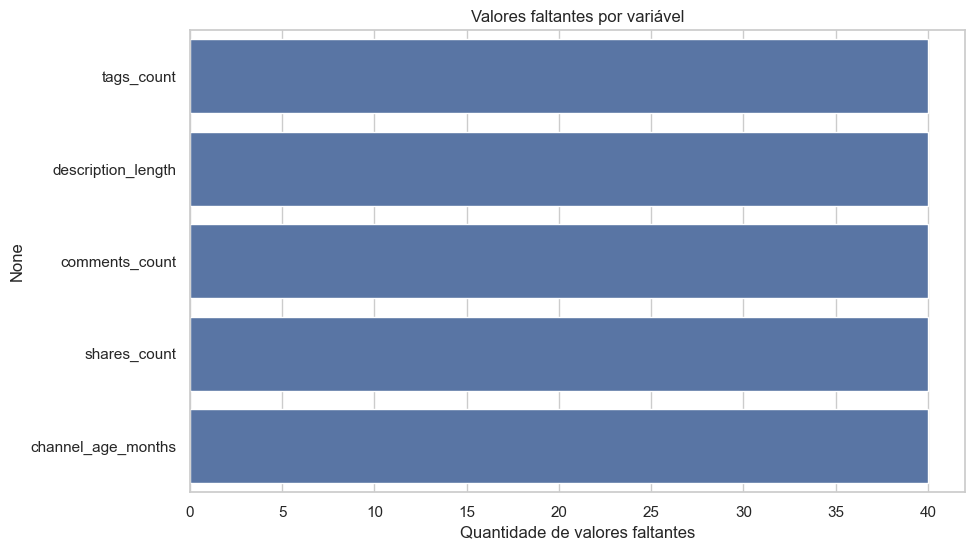

In [43]:
# Valores faltantes por coluna
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.concat([missing, missing_pct], axis=1)
missing_df.columns = ['missing_count', 'missing_pct']
display(missing_df[missing_df['missing_count']>0])

# Gráfico de missing (se houver)
if missing_df['missing_count'].sum() > 0:
    plt.figure(figsize=(10,6))
    sns.barplot(x=missing_df[missing_df['missing_count']>0]['missing_count'].values,
                y=missing_df[missing_df['missing_count']>0].index)
    plt.xlabel('Quantidade de valores faltantes')
    plt.title('Valores faltantes por variável')
    plt.show()
else:
    print('Nenhum valor faltante detectado.')

## 5) Análise da Variável Alvo (`views`)

Analisar distribuição, estatísticas e normalidade.

,stats
count,2.520000e+03
mean,8.604780e+05
std,7.019594e+05
min,8.522200e+04
25%,4.054298e+05
50%,6.460430e+05
75%,1.084820e+06
max,4.963004e+06


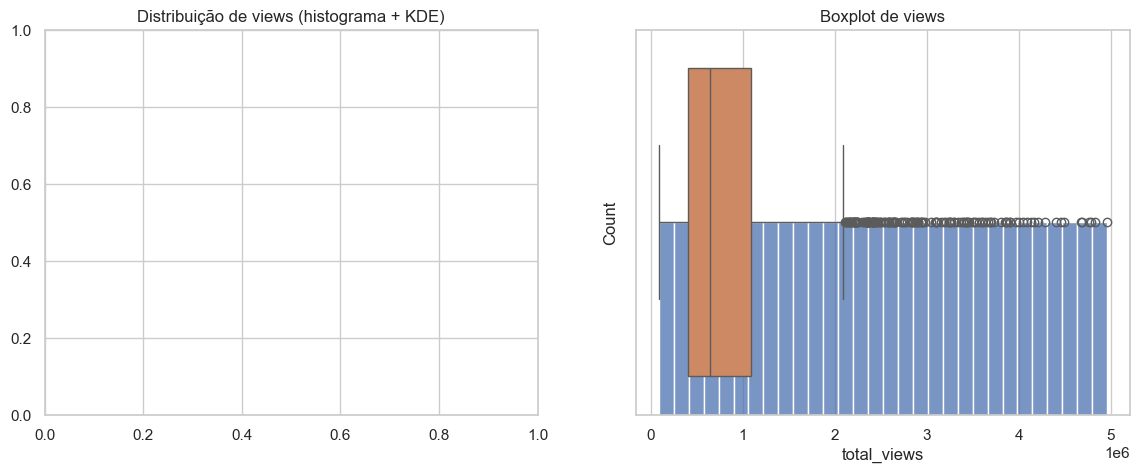

Skewness: 2.1825
Kurtosis: 6.2915
Shapiro-Wilk: stat=0.7583, p=1.993e-26  (p<0.05 => não normal) )


In [44]:
target = 'total_views'
if target not in df.columns:
    raise KeyError(f"Coluna alvo '{target}' não encontrada no dataset. Colunas disponíveis: {list(df.columns)}")

# Estatísticas
display(df[target].describe().to_frame('stats'))

# Histograma + KDE e boxplot
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.histplot(df['total_views'], bins=30)
ax[0].set_title('Distribuição de views (histograma + KDE)')
sns.boxplot(x=df[target], ax=ax[1])
ax[1].set_title('Boxplot de views')
plt.show()

# Skewness e kurtosis
print('Skewness:', df[target].skew().round(4))
print('Kurtosis:', df[target].kurtosis().round(4))

# Teste de normalidade (usar amostra se dataset grande)
sample = df[target].dropna().sample(n=min(500, len(df)), random_state=42)
stat, p = stats.shapiro(sample)
print(f"Shapiro-Wilk: stat={stat:.4f}, p={p:.4g}  (p<0.05 => não normal) )")

## 6) Análise Univariada - Variáveis Numéricas

Histograma e estatísticas para cada variável numérica (exceto id e target).

Variáveis numéricas analisadas: ['duration_minutes', 'title_length', 'description_length', 'tags_count', 'channel_subscribers', 'channel_age_months', 'previous_videos_count', 'avg_upload_frequency_days', 'comments_count', 'likes_count', 'shares_count', 'playlist_adds', 'total_views']

Coluna: duration_minutes


,duration_minutes
count,2520.000000
mean,31.942460
std,18.598756
min,-7.000000
25%,17.000000
50%,32.000000
75%,46.000000
max,174.000000


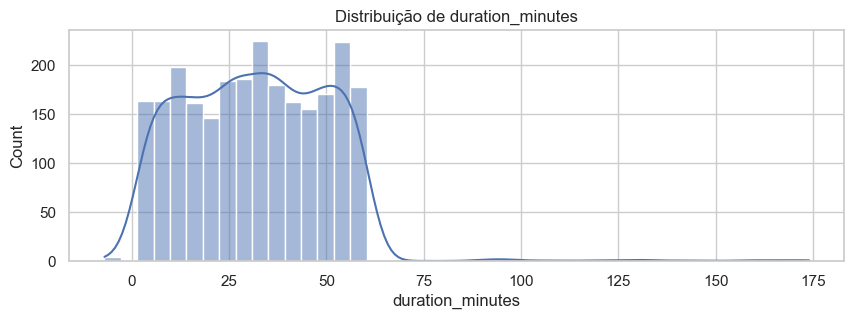

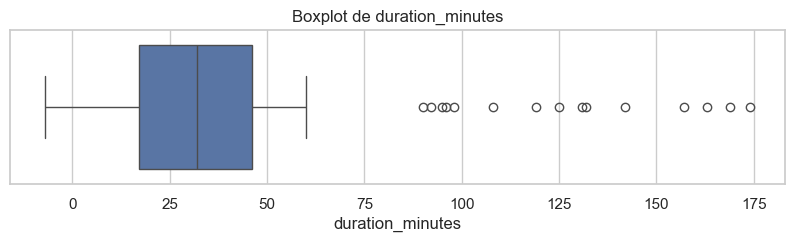


Coluna: title_length


,title_length
count,2520.000000
mean,54.436111
std,26.116815
min,10.000000
25%,31.750000
50%,54.000000
75%,77.000000
max,100.000000


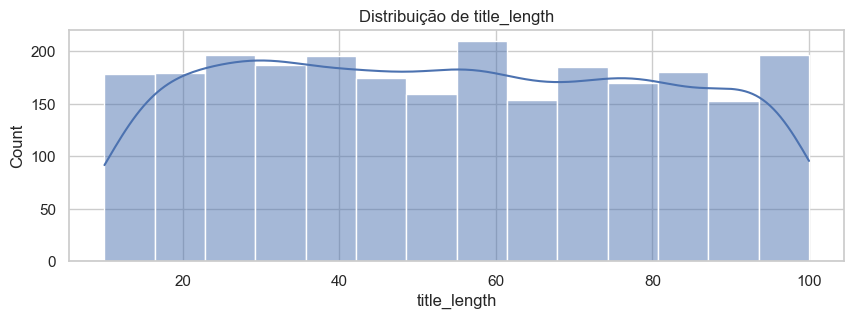

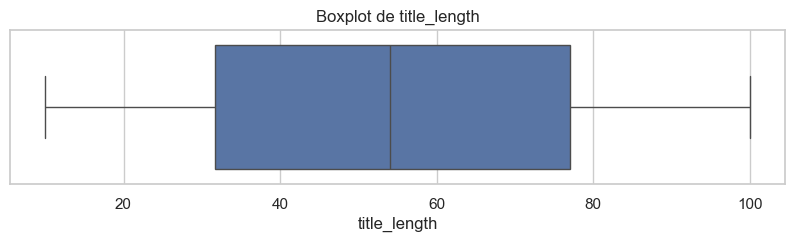


Coluna: description_length


,description_length
count,2480.000000
mean,536.062097
std,275.770823
min,50.000000
25%,295.000000
50%,535.000000
75%,775.000000
max,1000.000000


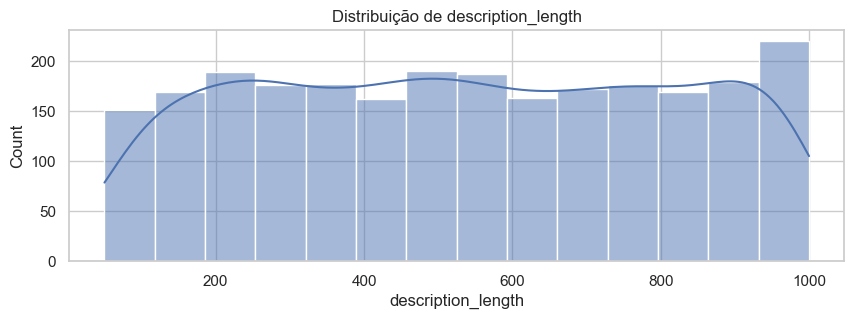

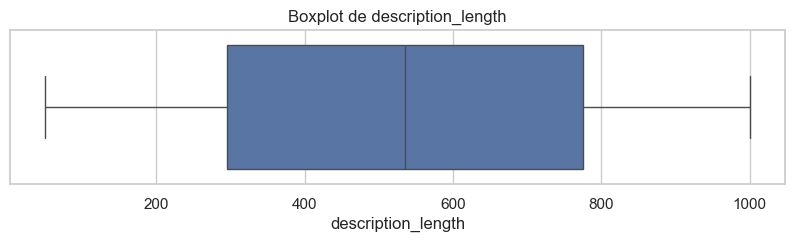


Coluna: tags_count


,tags_count
count,2480.000000
mean,24.715726
std,14.709814
min,0.000000
25%,12.000000
50%,24.000000
75%,37.250000
max,50.000000


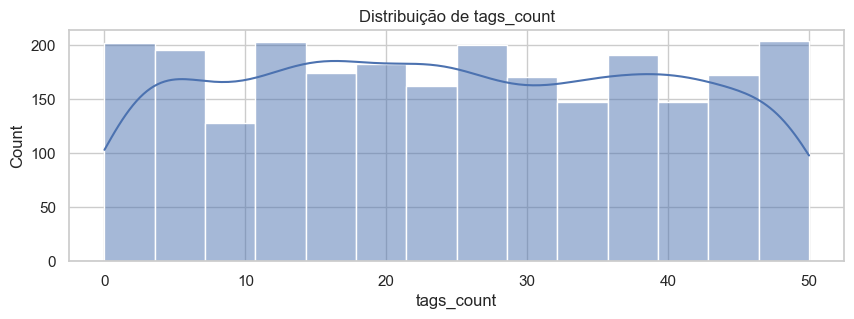

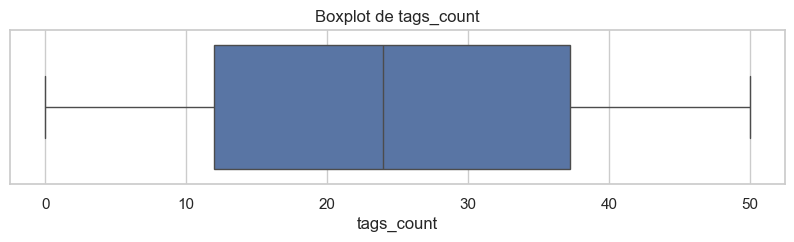


Coluna: channel_subscribers


,channel_subscribers
count,2.520000e+03
mean,5.119479e+05
std,3.874734e+05
min,-8.440000e+02
25%,2.356905e+05
50%,4.995060e+05
75%,7.558422e+05
max,4.928963e+06


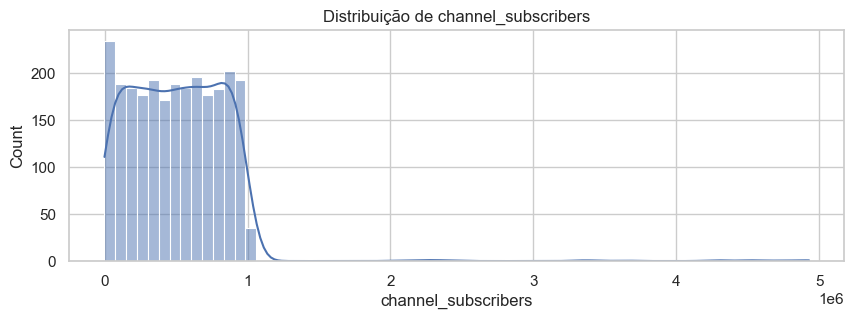

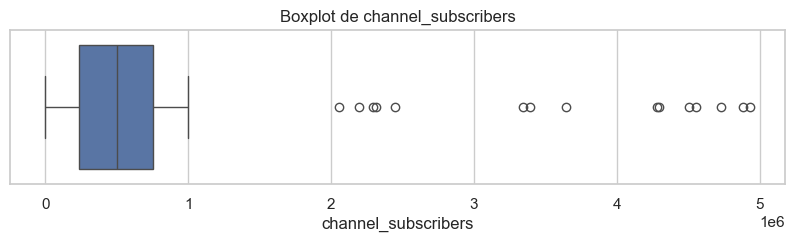


Coluna: channel_age_months


,channel_age_months
count,2480.000000
mean,59.449194
std,34.950178
min,1.000000
25%,30.000000
50%,59.000000
75%,89.000000
max,120.000000


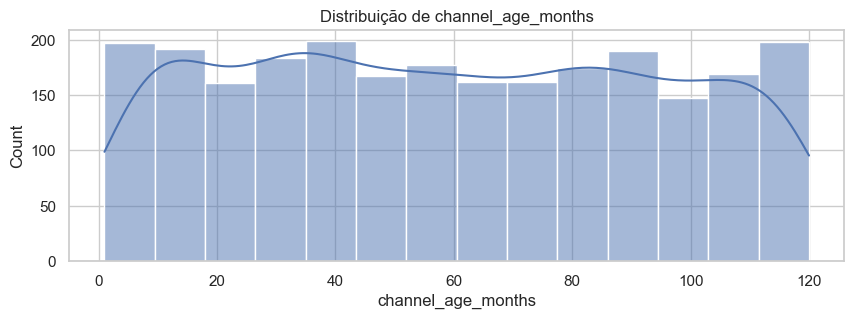

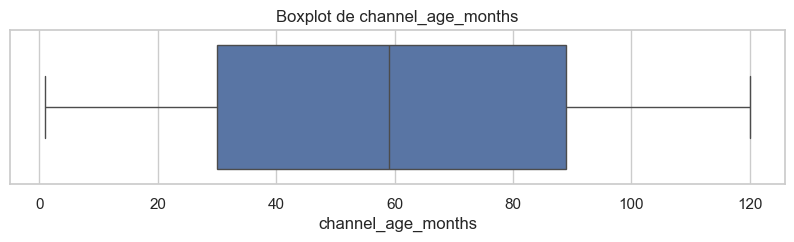


Coluna: previous_videos_count


,previous_videos_count
count,2520.000000
mean,247.055952
std,146.125772
min,0.000000
25%,117.000000
50%,249.500000
75%,370.000000
max,500.000000


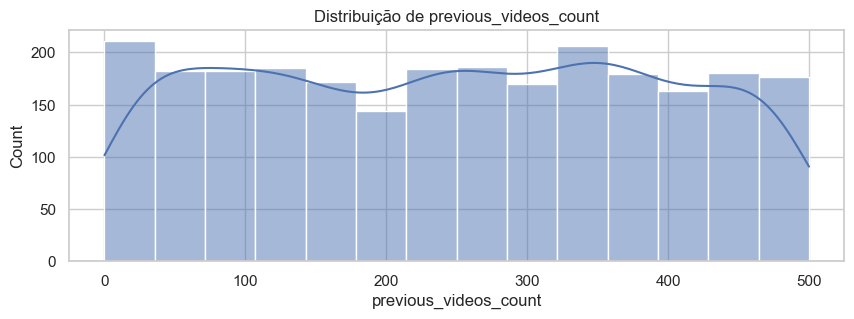

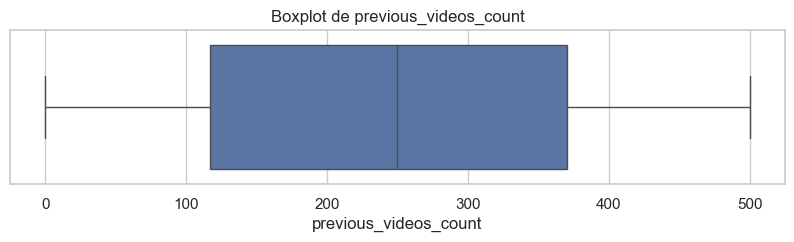


Coluna: avg_upload_frequency_days


,avg_upload_frequency_days
count,2520.000000
mean,15.711905
std,8.723234
min,1.000000
25%,8.000000
50%,16.000000
75%,23.000000
max,30.000000


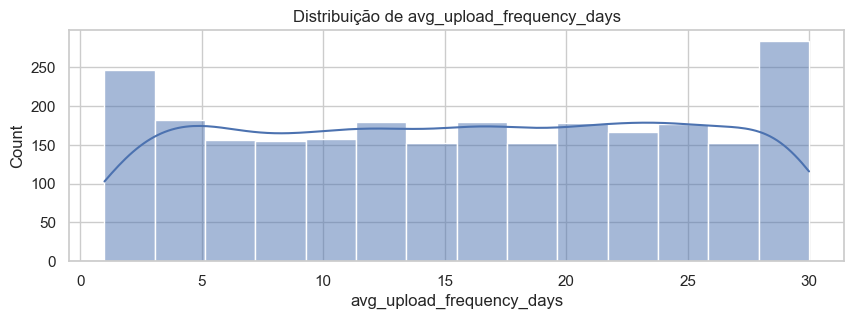

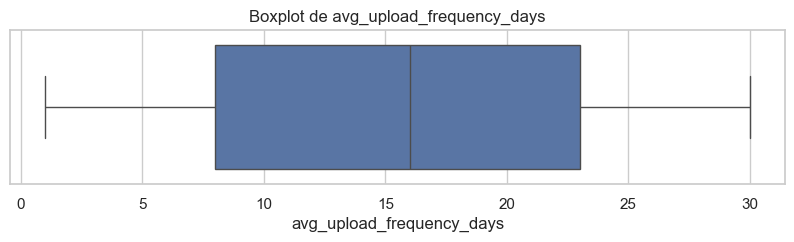


Coluna: comments_count


,comments_count
count,2480.000000
mean,4888.475000
std,2851.615977
min,6.000000
25%,2502.000000
50%,4845.000000
75%,7317.750000
max,9998.000000


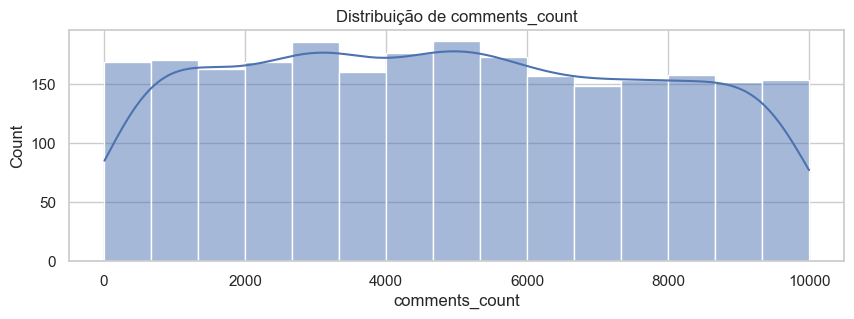

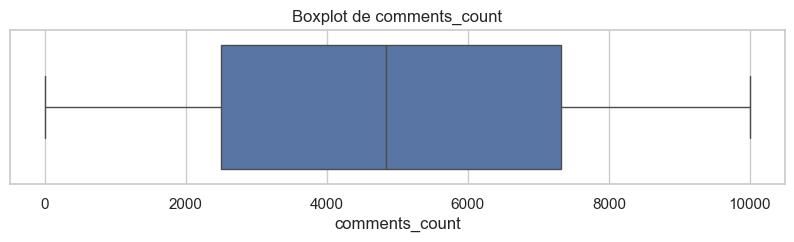


Coluna: likes_count


,likes_count
count,2520.000000
mean,25141.834127
std,14640.476699
min,-259.000000
25%,12304.250000
50%,25031.500000
75%,37916.500000
max,49985.000000


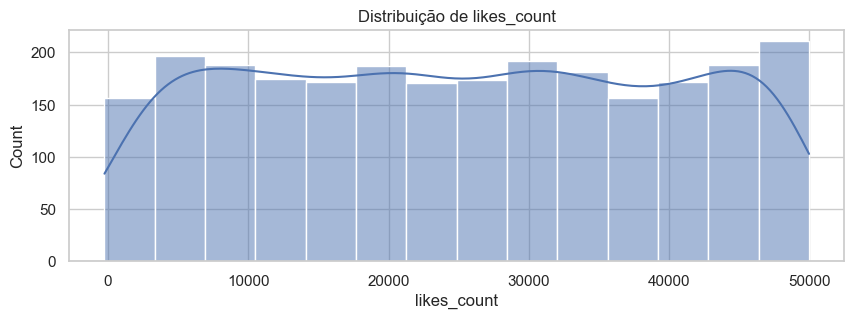

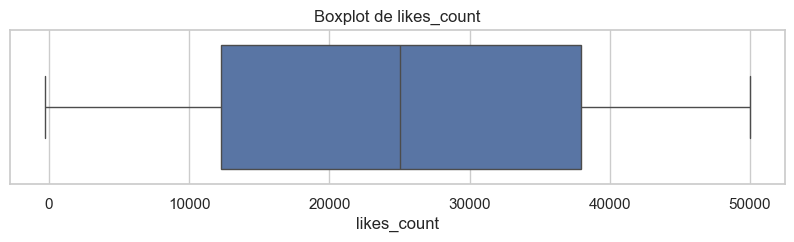


Coluna: shares_count


,shares_count
count,2480.000000
mean,2487.693952
std,1433.503747
min,0.000000
25%,1277.000000
50%,2469.500000
75%,3736.250000
max,4998.000000


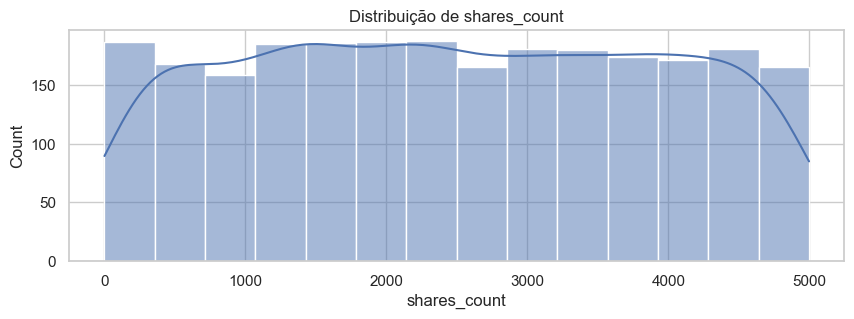

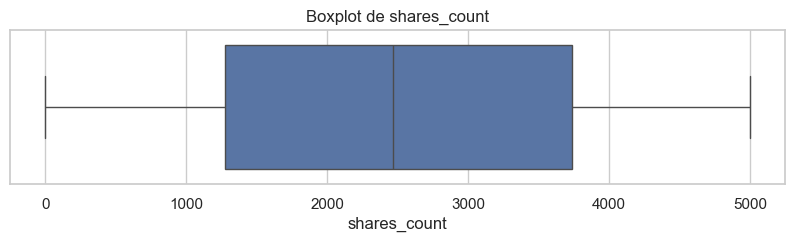


Coluna: playlist_adds


,playlist_adds
count,2520.000000
mean,499.431746
std,293.222464
min,0.000000
25%,238.000000
50%,500.000000
75%,755.000000
max,1000.000000


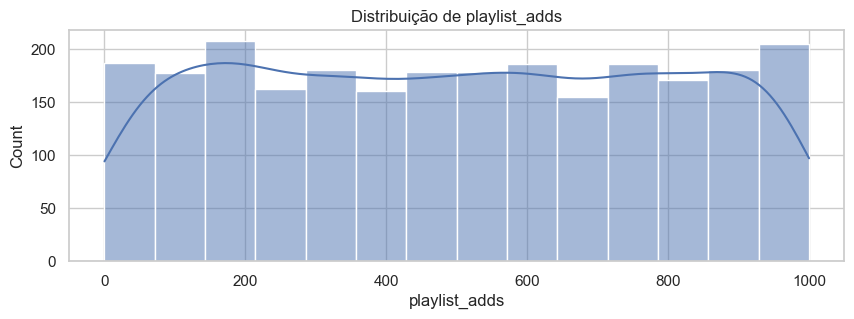

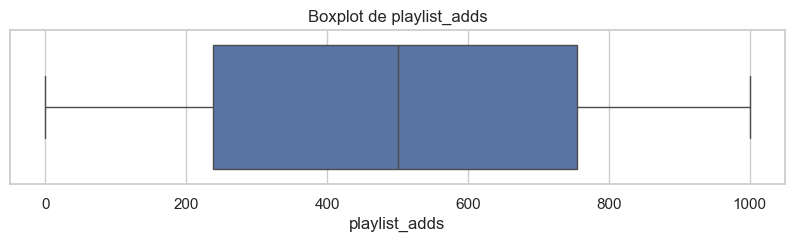


Coluna: total_views


,total_views
count,2.520000e+03
mean,8.604780e+05
std,7.019594e+05
min,8.522200e+04
25%,4.054298e+05
50%,6.460430e+05
75%,1.084820e+06
max,4.963004e+06


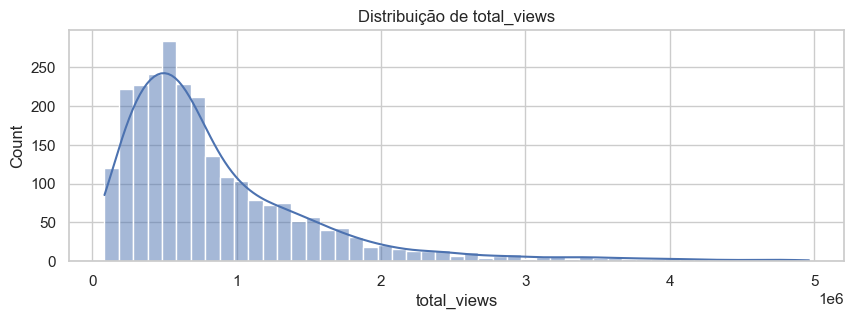

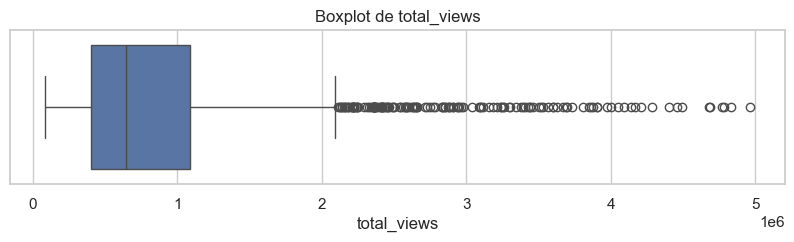

In [45]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Excluir colunas identificadoras e target se existirem
exclude = ['views', 'student_id', 'id', 'video_id']
num_cols = [c for c in num_cols if c not in exclude]

print('Variáveis numéricas analisadas:', num_cols)

for col in num_cols:
    print('\n' + '='*40)
    print('Coluna:', col)
    display(df[col].describe().to_frame(col))
    plt.figure(figsize=(10,3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()
    plt.figure(figsize=(10,2))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot de {col}')
    plt.show()

## 7) Análise Univariada - Variáveis Categóricas

Contagem de categorias e problemas de formatação.

Variáveis categóricas: ['video_id', 'has_thumbnail_custom', 'video_quality', 'category', 'language', 'has_subtitles', 'promoted', 'upload_time', 'upload_day']

Coluna: video_id


,count
video_id,
VID00197,1
VID00987,1
VID01091,1
VID00388,1
VID02222,1
VID00169,1
VID01379,1
VID02463,1
VID00706,1


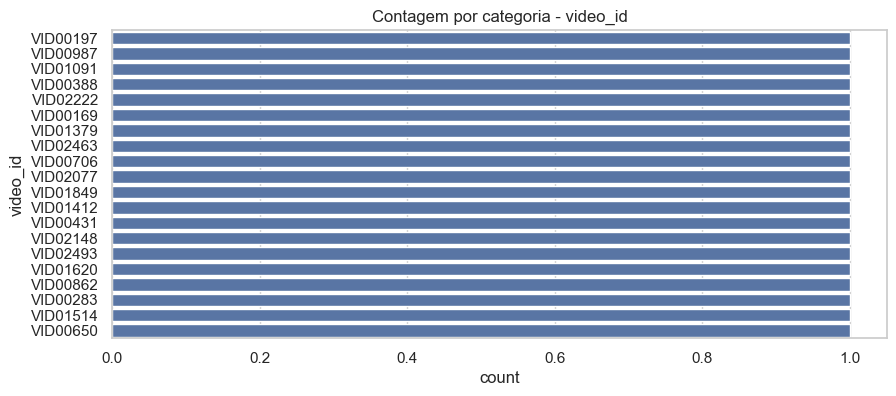


Coluna: has_thumbnail_custom


,count
has_thumbnail_custom,
Sim,1734
Não,786


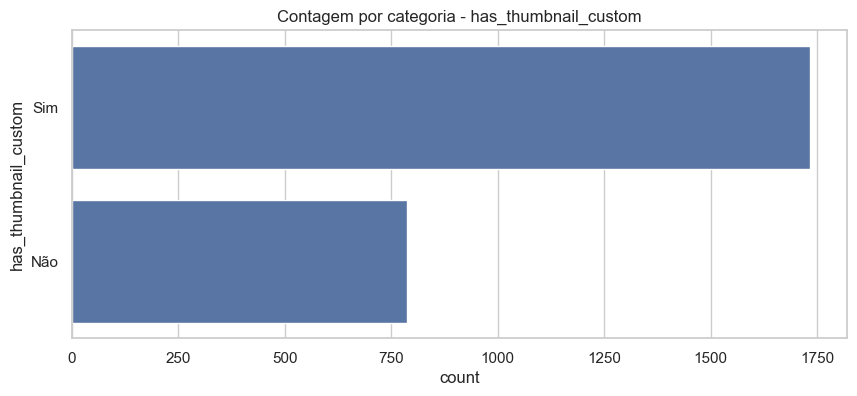


Coluna: video_quality


,count
video_quality,
1080p,1284
720p,733
480p,260
4K,240
4k,3


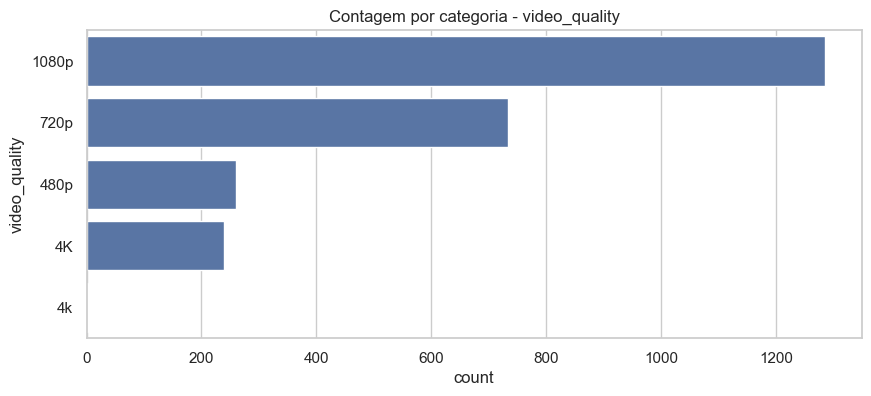


Coluna: category


,count
category,
Fitness,404
Gaming,362
Educação,355
Vlogs,354
Tecnologia,352
Culinária,343
Música,325
Fitness,7
Gaming,6


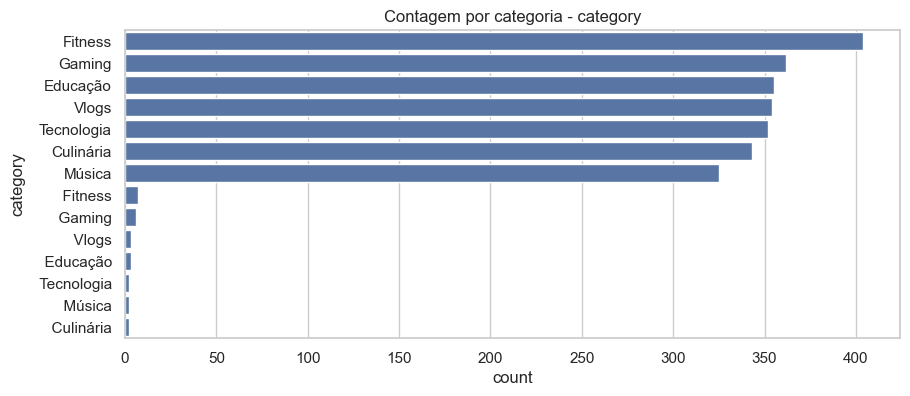


Coluna: language


,count
language,
Português,1513
Inglês,738
Espanhol,244
INGLÊS,11
PORTUGUÊS,11
ESPANHOL,3


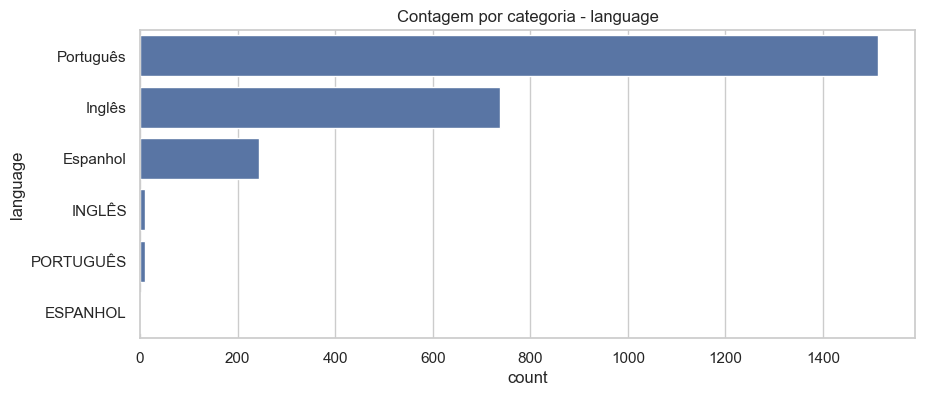


Coluna: has_subtitles


,count
has_subtitles,
Não,1477
Sim,1043


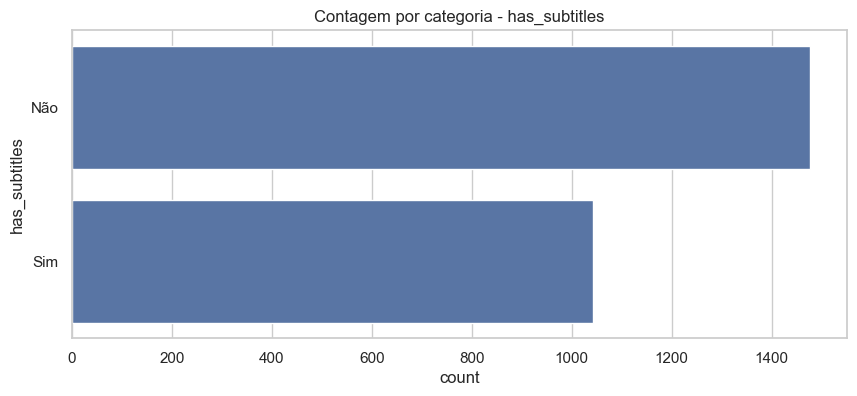


Coluna: promoted


,count
promoted,
Não,2138
Sim,382


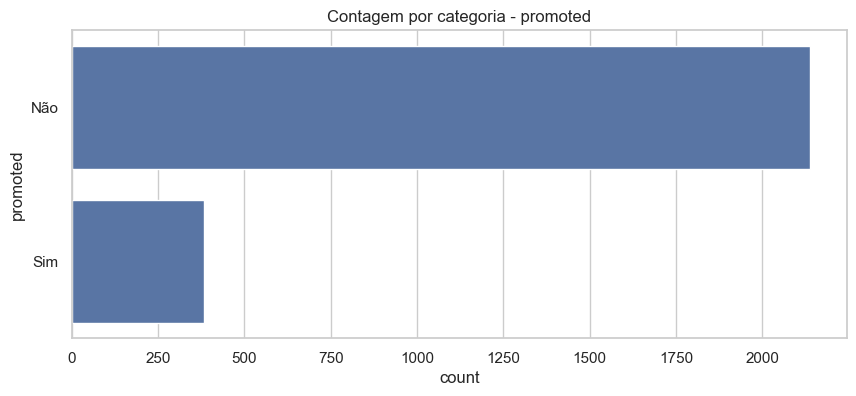


Coluna: upload_time


,count
upload_time,
Manhã,683
Noite,632
Madrugada,612
Tarde,593


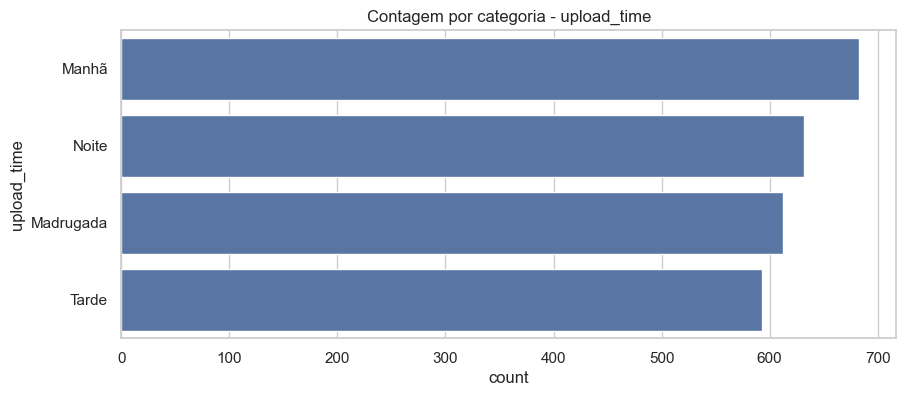


Coluna: upload_day


,count
upload_day,
Domingo,662
Sábado,635
Sexta,634
Seg-Qui,589


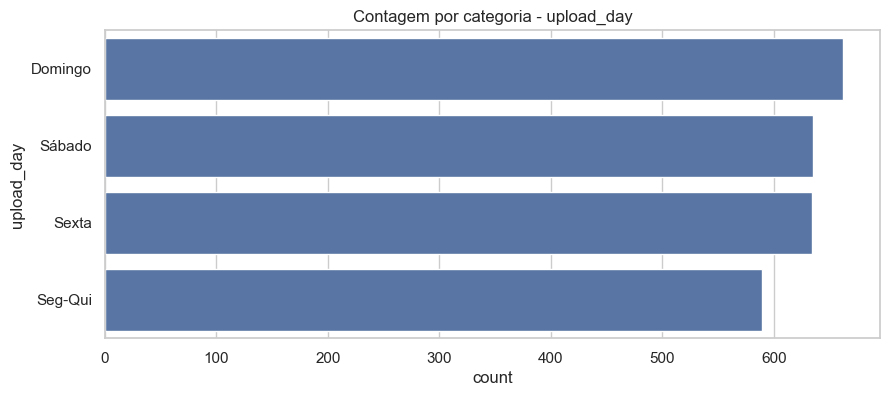

In [46]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Variáveis categóricas:', cat_cols)

for col in cat_cols:
    print('\n' + '='*40)
    print('Coluna:', col)
    display(df[col].value_counts(dropna=False).to_frame('count').head(20))
    plt.figure(figsize=(10,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index[:20])
    plt.title(f'Contagem por categoria - {col}')
    plt.show()

## 8) Análise de Correlações

Matriz de correlação entre variáveis numéricas e correlação com a variável alvo.

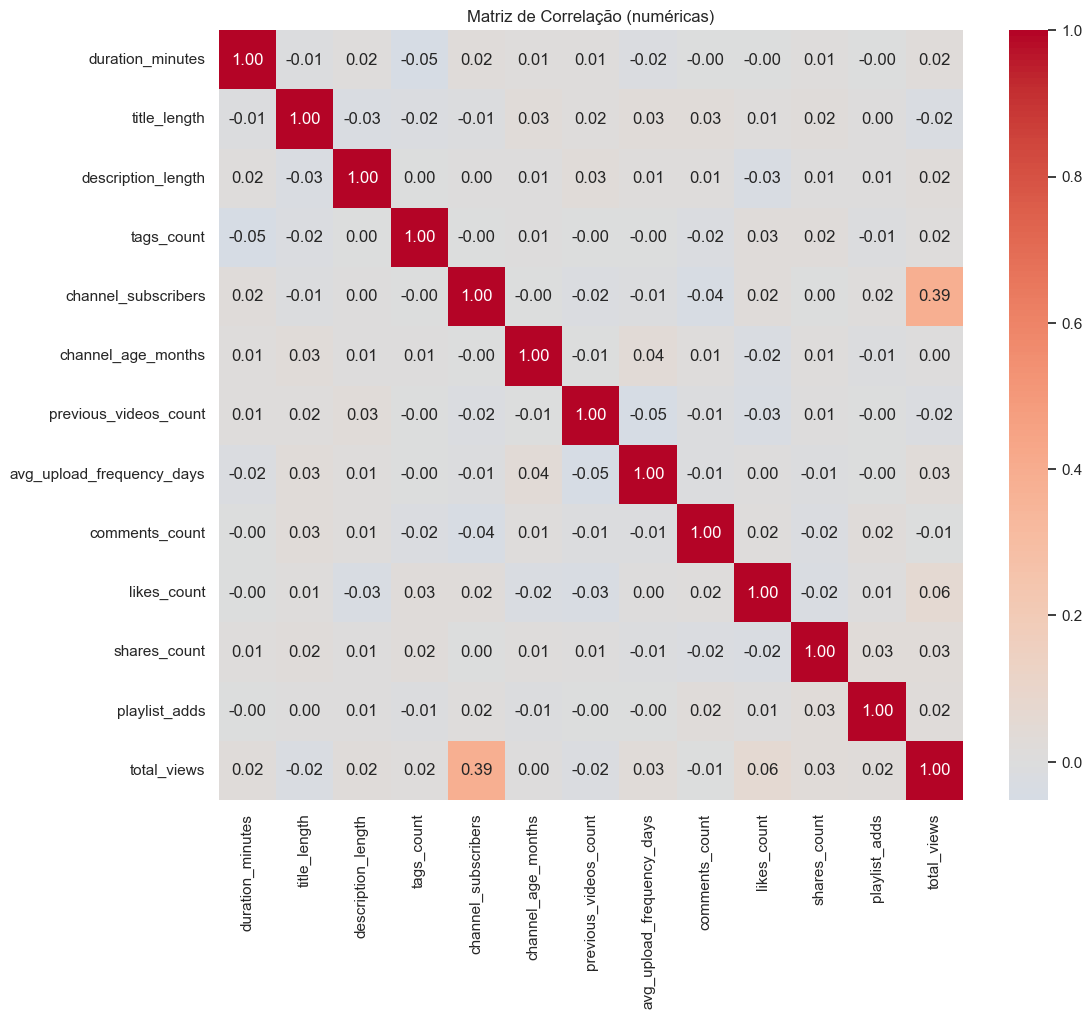

In [47]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlação (numéricas)')
plt.show()

# Correlação com target
if 'views' in corr.columns:
    corr_with_target = corr['views'].sort_values(ascending=False)
    display(corr_with_target.to_frame('corr_with_views'))

## 9) Análise Bivariada (Features vs Target)

Exemplos de boxplots por categoria e scatterplots para numéricas vs views.

In [ ]:
# Boxplot de views por categoria (usar a primeira coluna categórica disponível se houver)
if len(cat_cols) > 0:
    cat = cat_cols[0]
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x=cat, y='total_views')
    plt.xticks(rotation=90)
    plt.title(f'Visualizações por categoria ({cat})')
    plt.show()
else:
    print('Nenhuma variável categórica disponível para boxplot por categoria.')

# Scatter plots das top 4 correlações numéricas com views (exclui target)
if 'views' in corr.columns:
    top_feats = corr_with_target.drop('views').abs().sort_values(ascending=False).head(4).index.tolist()
    print('Top features numéricas correlacionadas com views:', top_feats)
    for f in top_feats:
        plt.figure(figsize=(8,4))
        sns.scatterplot(data=df, x=f, y='views')
        plt.title(f'Views vs {f}')
        plt.show()

ValueError: Could not interpret value `views` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

## 10) Identificação de Outliers

Contagem de outliers por IQR para variáveis numéricas (incluindo target)

In [ ]:
def iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return ((series < lower) | (series > upper))

outlier_summary = {}
for col in num_df.columns:
    ser = num_df[col].dropna()
    if len(ser) == 0: 
        continue
    mask = iqr_outliers(ser)
    outlier_summary[col] = {'n_outliers': int(mask.sum()), 'pct': float(mask.sum() / len(ser) * 100)}
out_df = pd.DataFrame(outlier_summary).T.sort_values('pct', ascending=False)
display(out_df.head(20))

## 11) Conclusões e Descobertas

- Resuma aqui as principais características do dataset (tamanho, tipos, qualidade).
- Liste os problemas encontrados (missing, outliers, inconsistências).
- Comente sobre a variável alvo `views` (distribuição, skewness, outliers).
- Indique as features com maior correlação e próximos passos sugeridos (normalização, transformação de variáveis, encoding e feature engineering).